# COGS 108 - EDA Checkpoint

- Zoe Qiao
- Chuning Liu
- Yuheng Ge
- Catherine Shen

<a id='research_question'></a>
# Research Question

Due to the spread of COVID-19 starting in 2020, all sectors of the economy were affected. Industries all over the world have encountered difficulties such as declined products and services, interrupted supply chains, and government-mandated lockdown policy. We are curious if there's a relationship between the COVID-19 pandemic and the employment of Industries?

# Setup

In [20]:
#pip install chart_studio

In [21]:
#pip install plotly-express
#pip install prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
from pandas import datetime
dateparse = lambda x : datetime.strptime(x, '%Y-%m-%d')
geography_industry = pd.read_csv("./COGS108/geography_industry.csv", encoding='latin-1', parse_dates=['post_date'], date_parser=dateparse)

/tmp/ipykernel_114/3184837704.py:12: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [22]:
geography_industry.head()

,post_date,state,industry,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Communication,1.0
2,2020-03-01,NaN,Construction,1.0
3,2020-03-01,NaN,Energy,1.0
4,2020-03-01,NaN,Entertainment,1.0


In [23]:
geography_industry = geography_industry.dropna()
geography_industry['state'] = geography_industry['state'].str.upper()
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
geography_industry = geography_industry[geography_industry['state'].isin(states)]
geography_industry.head()

,post_date,state,industry,count_id_indexed
17,2020-03-01,AK,Communication,1.0
18,2020-03-01,AK,Construction,1.0
19,2020-03-01,AK,Energy,1.0
20,2020-03-01,AK,Entertainment,0.0
21,2020-03-01,AK,Financial Services,1.0


In [24]:
geography_industry.describe()

,count_id_indexed
count,432975.000000
mean,1.047346
std,0.797569
min,0.000000
25%,0.615600
50%,0.886000
75%,1.241200
max,26.248000


# Data Cleaning

After we loaded and reviewed our dataset, we identified the following two problems:

1. The existence of 'NaN' cells
2. The State abbreviations are not consistant. They are sometimes capitalized, sometimes not.
3. The State abbreviations sometimes do not exist. For example, sh is a state abbreviation that occurs in the dataset, but this tate abbreviation does not exists in real life. 

Therefore, in the following cleaning steps, we will fixed these problems. 


In [25]:
# fix problem #1
geography_industry = geography_industry.dropna()
geography_industry.head()

,post_date,state,industry,count_id_indexed
17,2020-03-01,AK,Communication,1.0
18,2020-03-01,AK,Construction,1.0
19,2020-03-01,AK,Energy,1.0
20,2020-03-01,AK,Entertainment,0.0
21,2020-03-01,AK,Financial Services,1.0


In [26]:
# fix problem #2
geography_industry['state'] = geography_industry['state'].str.upper()
geography_industry.head()

,post_date,state,industry,count_id_indexed
17,2020-03-01,AK,Communication,1.0
18,2020-03-01,AK,Construction,1.0
19,2020-03-01,AK,Energy,1.0
20,2020-03-01,AK,Entertainment,0.0
21,2020-03-01,AK,Financial Services,1.0


In [27]:
# fix problem #3
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
geography_industry = geography_industry[geography_industry['state'].isin(states)]
geography_industry.head()

,post_date,state,industry,count_id_indexed
17,2020-03-01,AK,Communication,1.0
18,2020-03-01,AK,Construction,1.0
19,2020-03-01,AK,Energy,1.0
20,2020-03-01,AK,Entertainment,0.0
21,2020-03-01,AK,Financial Services,1.0


In [28]:
geography_industry.describe()

,count_id_indexed
count,432975.000000
mean,1.047346
std,0.797569
min,0.000000
25%,0.615600
50%,0.886000
75%,1.241200
max,26.248000


Now the dataset is cleaned and we will continue to the EDA portion to understand and explain the dataset. 

# Data Analysis & Results (EDA)

The x-axis, is the posted date, a time series, ranging from March 2020 to somewhere in September 2021.
According to information on CDC official website, January 31st, 2020 is the date that U.S. Secretary of Health and Human Services, declares the Covid-19 public health emergency and the White House then announced the implementation of new travel policies to be effective.

So our data basically measures the job listings in the US starting from the beginning of Covid all the way till last Summer, which lasts for around 1 and a half years. 
The y-axis, is called count_id_indexed. If a datapoint has a count_id_indexed of 3, it represents a 300% growth comparing to the start date. If more detailed definition is needed, more references are in the data cleaning section.

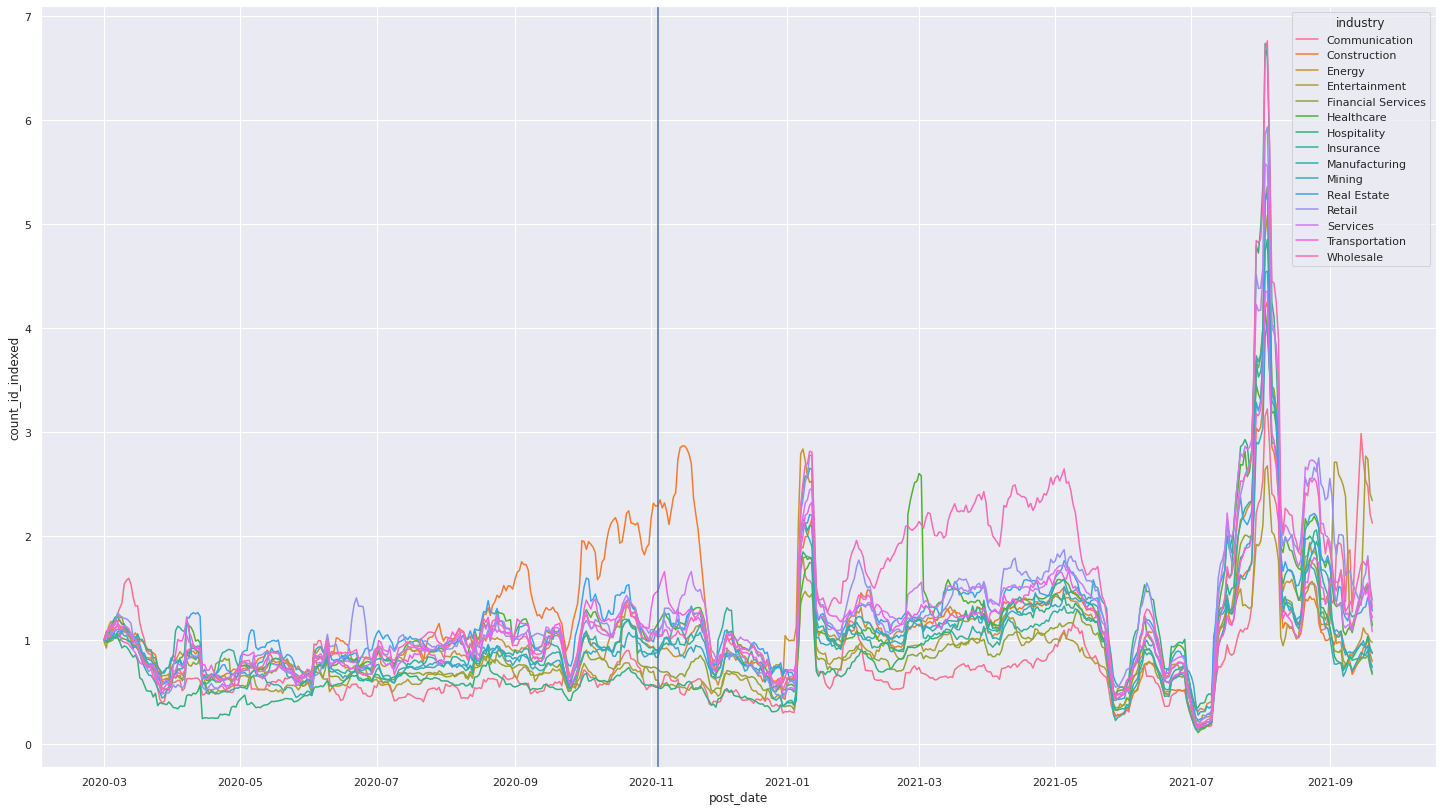

In [29]:
sns.set(rc = {'figure.figsize' : (25,14)})
graph = sns.lineplot(data = geography_industry , x = 'post_date', y = 'count_id_indexed', hue='industry',ci=None)
graph.axvline(x=18570) # US presidential election day

The x-axis, is the posted date, a time series, ranging from March 2020 to somewhere in September 2021.
According to information on CDC official website, January 31st, 2020 is the date that U.S. Secretary of Health and Human Services, declares the Covid-19 public health emergency and the White House then announced the implementation of new travel policies to be effective.

So our data basically measures the job listings in the US starting from the beginning of Covid all the way till last Summer, which lasts for around 1 and a half years. 
The y-axis, is called count_id_indexed. If a datapoint has a count_id_indexed of 3, it represents a 300% growth comparing to the start date. If more detailed definition is needed, more references are in the data cleaning section.

The line plot above is showing industry trends in the US, with different line colors representing different industries. 

Ever since the start of Covid, the overall trend is similar, but we could identify three peaks as outliers. 

The first peak is only for the construction industry, which reaches count_id_indexed at 3 around the end of November. This happens because the U.S. presidential election happens on November 3, 2020, so it's a presidential campaign until then. The Trump administration will lean toward business when it comes to infrastructure projects. They have an ambitious goal of investing $1.5 trillion in infrastructure over the next decade. These investments have not only led to a surge in construction jobs, but have had positive spillover effects on related industries such as steel, cement and heavy equipment manufacturing.   

The second peak came after the widespread availability of vaccines in the United States. This development was particularly beneficial to industries that were severely impacted by the pandemic, such as hospitality, tourism and entertainment. As vaccination rates increased, consumer confidence grew, leading to a rebound in demand for services in these industries. In addition, industries such as pharmaceuticals and biotechnology experienced growth due to their role in vaccine development and distribution. 

The third peak occurs around End of July. This happened because, on July 9th, Johnson & Johnson and Pfizer reported that both of their vaccines are effective against covid variants, including the highly contagious delta variant. It took some time for the job market to react, but overall, we can see an increasing trend, and results in a 500% increase in unique job listings. 

Timeline based on CDC official website (https://www.cdc.gov/museum/timeline/covid19.html)


Since we indentify some fluctuation in the Construction Industry, we want to map out a more detailed change in the Construction Industry overtime. 
In the choropleth map below, we aimed to get the job listing change in the Construction industry overtime in every US states. 
Therefore, we first all get the Construction rows from geography_industry. Then we set a time range from 2020-09-10 to 2020-12-10. This is a general and vague time range, because we want to see more changes in one visualiztion. However, the most important part is we included the peak, which ranges from 2020-11-01 to 2020-12-01.

The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. 
https://plotly.com/python/plotly-express/

In [38]:
df = geography_industry[geography_industry['industry']=='Construction']
df = df[(df['post_date'] >= '2020-09-10') & (df['post_date'] < '2020-12-10')]
df['post_date'] = pd.to_datetime(df['post_date']).dt.date.astype(str)
fig = px.choropleth(df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='count_id_indexed',
                    color_continuous_scale="rainbow_r", 
                    animation_frame = 'post_date'
                    )
#fig.show()
iplot(fig)

From the plotted choropleth map, we could slide the window in the bottom and the map will be updated according to its date. We could see that the color gets more constrast, showing a drastic change in the number of Job Listings overtime. 

We want to take a look at how count_id_index various during 09/10/2020 to 12/10/2020 for different states across the country. To do so, we create a map of the U.S. to visualize the change of count_id_index using Plotly.express. From the map, we can observe that there's no dramatic difference in value for different states. However, by scrolling the bar below from left to right, we do notice that during this time, the growing rate of the total number of job postings is gradually decreasing. This trend especially affects the west coast and east coast areas (such as CA, NY, WA, and ME). States in the mid of the U.S.(such as NE, MO, and AR) are less affected by this trend. But in general, all states' total job availability was affected by COVID-19.

It turned out that the employment in each states were different. Those states in the middle part of the United states has a lower increase in the job listing while the states in the Western United States seemed to have a faster grow in the job listing of contruction industry.

In [31]:
from prophet import Prophet

After we finished our analysis on the Construction Industry, we switched to a more general trend. 
Since we see some fluctuation and an overall trend from this graph, we want to take out several industries and predict the future to see how COVID-19 actually effected Job lisings in United States.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

We choose Prophet because we are data is also time series related, since Job lisings are strongly connected to large impacted events happening in the States currently. All Job listings are assumed to must have a strong correlation with time.

https://facebook.github.io/prophet/ 

In [32]:
geography_industry_Comm = geography_industry[geography_industry['industry'] == 'Communication']
type(geography_industry_Comm.iat[0,0])
geography_industry_Comm = geography_industry_Comm.drop(columns=['state', 'industry'])
geography_industry_Comm.rename(columns={"post_date": "ds", "count_id_indexed": "y"}, inplace=True)
q = geography_industry_Comm["y"].quantile(0.975)
geography_industry_Comm = geography_industry_Comm[geography_industry_Comm["y"] < q]
geography_industry_Comm.max()

ds    2021-09-20 00:00:00
y                  2.5576
dtype: object

In [33]:
geography_industry_Comm['cap'] = 8
m = Prophet(growth='logistic')
m.fit(geography_industry_Comm)

23:02:30 - cmdstanpy - INFO - Chain [1] start processing
23:02:37 - cmdstanpy - INFO - Chain [1] done processing


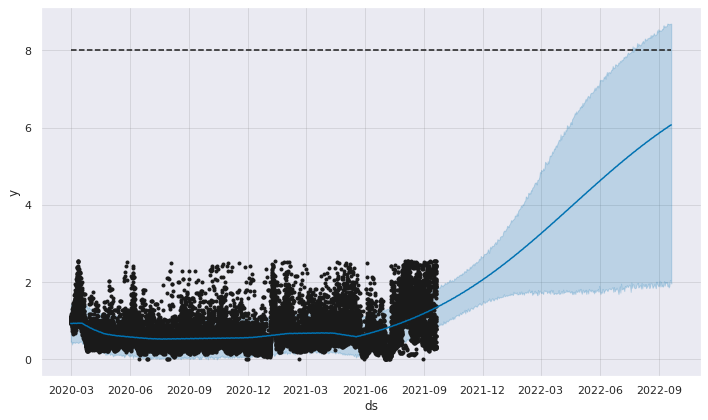

In [34]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 8
fcst = m.predict(future)
fig = m.plot(fcst)

This is a graph forecasting the Communication Industry in US
For the forecasting part, we cleaned the data, dropped the top 1% of data as outlier, and trained the remaining 99% of data using facebook prophet as our model. The model concluded that relative gradient magnitude is below tolerance and give us the above prediction. 

In the graph, 
→the black dotted points represents the historical training data points
→the blue line represents the forecasts generated for both history and future
→the light blue region represents the uncertainty bands 

We
→ Dropped the top 1% as outliers, forecast using the remaining 99% of the data
→ Forecasting the next 365 days
→ Expecting a 400% to 800% growth for the next year

In [35]:
geography_industry_Cons = geography_industry[geography_industry['industry'] == 'Construction']
#akComm = sns.relplot(data=geography_industry_Comm, x='post_date', y='count_id_indexed', col='state')
type(geography_industry_Cons.iat[0,0])
geography_industry_Cons = geography_industry_Cons.drop(columns=['state', 'industry'])
geography_industry_Cons.rename(columns={"post_date": "ds", "count_id_indexed": "y"}, inplace=True)
q = geography_industry_Cons["y"].quantile(0.975)
geography_industry_Cons = geography_industry_Cons[geography_industry_Cons["y"] < q]
geography_industry_Cons.max()
geography_industry_Cons['cap'] = 8
m = Prophet(growth='logistic')
m.fit(geography_industry_Cons)

23:02:40 - cmdstanpy - INFO - Chain [1] start processing
23:02:53 - cmdstanpy - INFO - Chain [1] done processing


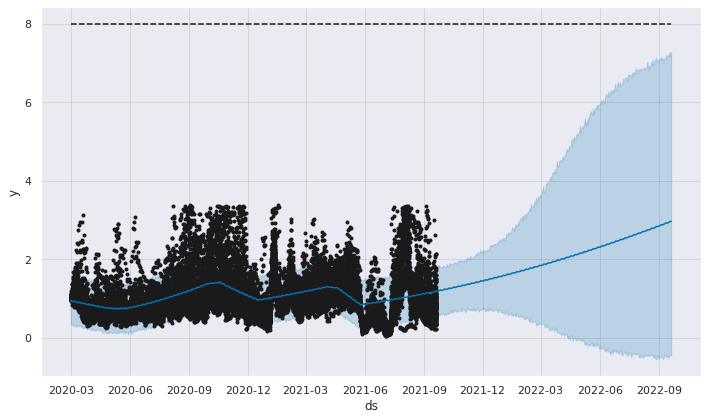

In [36]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 8
fcst = m.predict(future)
fig = m.plot(fcst)

This is a graph forecasting the Communication Industry in US, which we applied very similar techniques. 
For the forecasting part, we cleaned the data, dropped the top 1% of data as outlier, and trained the remaining 99% of data using facebook prophet as our model. The model concluded that relative gradient magnitude is below tolerance and give us the above prediction. 

In the graph, 
- the black dotted points represents the historical training data points
- the blue line represents the forecasts generated for both history and future
- the light blue region represents the uncertainty bands 

We try to use the data here to forecast the next 365 days and sees an Expecting growth of ranging from 400% to 800%